# Product Sales Analysis


**_Data Validation and Cleaning:_**

The dataset contains 15000 rows and 8 columns before cleaning and validataion. 

Data type of week, nb_sold, revenue, years_as_customer and nb_site_visits changed from object to numeric.

- week: No cleaning was needed, consistent with the description. 
- sales_method: 3 categories without missing values. Mistakes were corrected, 'em + call' and 'email' were replaced with 'Email + Call' and 'Email'.
- customer_id: 13897 unique values without missing values, replaced inappropriate values with Null. Consistent with the description. 
- nb_sold: Numeric values without missing values, same as the description. 
- revenue: Numeric values without missing values, replaced inappropriate values with Null. Same as the description. 
- years_as_customer: Numeric values without missing values, with a maximum value of 39, as described. Erroneous values exceeding 40 years were replaced with Null.
- nb_site_visits: Numeric values without missing values, same as the description. 
- state: 50 unique states without missing values, replaced inappropriate values with Null, consistent with the description. 

Missing and duplicated values were handled. No further cleaning is needed.
After the data validation, the dataset contains 13897 rows and 8 columns without missing values.




In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Loading the data
df = pd.read_csv('product_sales.csv')

## Data validation
# You can uncomment the print functions to see the results of cleaning data
#print(df.shape)
#print(df.info())
# sale's method column

#print(df['sales_method'].unique())
df[df['sales_method'] == 'email'] = 'Email'
df[df['sales_method'] == 'em + call'] = 'Email + Call'
#print(df['sales_method'].unique())

# Convert certain columns to numeric type

columns_to_convert = ['week', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
# week column

#print(df['week'].nunique())

# customer_id column

#print(df['customer_id'].value_counts())
condition = df['customer_id'].isin(['Email + Call', 'Email']) 
df.loc[condition, 'customer_id'] = np.nan
#print(df['customer_id'].value_counts())

# nb_sold column

#print(df['nb_sold'].value_counts())

# revenue column

#print(df['revenue'].value_counts())

# years_as_customer

condition2 = df['years_as_customer'] > 40
df.loc[condition2, 'years_as_customer'] = np.nan
#print(df['years_as_customer'].max(), '\n', df['years_as_customer'].min(), '\n', df['years_as_customer'].value_counts())


# nb_site_visits column

#print(df['nb_site_visits'].value_counts())

# state column

#print(df['state'].value_counts())
condition3 = df['state'].isin(['Email + Call', 'Email']) 
df.loc[condition3, 'state'] = np.nan
#print(df['state'].value_counts(), '\n', df['state'].nunique())

# Handling missing values and duplicate rows

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print(df.info())
print(df.shape)





<class 'pandas.core.frame.DataFrame'>
Index: 13897 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13897 non-null  float64
 1   sales_method       13897 non-null  object 
 2   customer_id        13897 non-null  object 
 3   nb_sold            13897 non-null  float64
 4   revenue            13897 non-null  float64
 5   years_as_customer  13897 non-null  float64
 6   nb_site_visits     13897 non-null  float64
 7   state              13897 non-null  object 
dtypes: float64(5), object(3)
memory usage: 977.1+ KB
None
(13897, 8)


/var/folders/vm/tx5_p67536gbw9nt3vl758cm0000gn/T/ipykernel_81126/671458405.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Email' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df['sales_method'] == 'email'] = 'Email'
/var/folders/vm/tx5_p67536gbw9nt3vl758cm0000gn/T/ipykernel_81126/671458405.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Email' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df['sales_method'] == 'email'] = 'Email'
/var/folders/vm/tx5_p67536gbw9nt3vl758cm0000gn/T/ipykernel_81126/671458405.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Email' has dtype incompatible with float64, please explicitly cast to a compatible dtyp

**_Exploratory Analysis:_**

Number of Customers by Sales Method:


The Email method exhibited the highest number of customers, followed by Call method.

- Email: 6915

- Call: 4781

- Email + Call: 2203


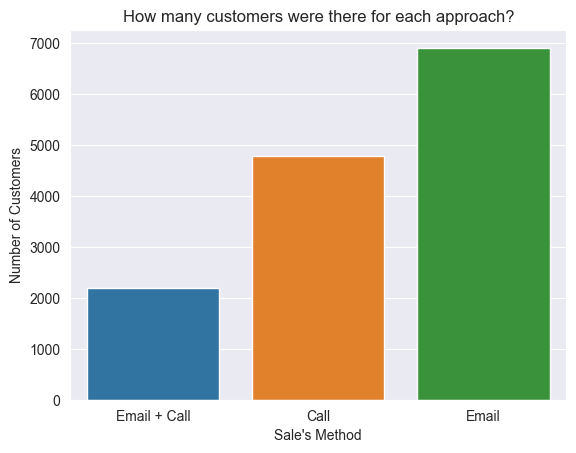

In [2]:
# How many customers were there for each approach?

df_1 = df.groupby('sales_method').agg({'customer_id' : 'nunique'})
df_1 = df_1.sort_values(by='customer_id')
sns.barplot(x='sales_method', y='customer_id', data = df_1, hue='sales_method')

# Add labels and title
plt.xlabel("Sale's Method")
plt.ylabel('Number of Customers')
plt.title('How many customers were there for each approach?')

# Show plot
plt.show()


*Spread of Revenue:*


The overall spread of revenue was visualized using a box plot, revealing the presence of outliers indicating exceptionally high revenue.



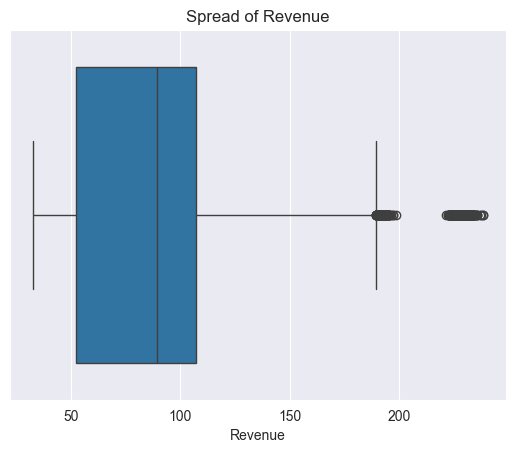

In [3]:
# What does the spread of revenue looks like overall?

sns.boxplot(data=df, x='revenue')

# Add labels and title
plt.xlabel('Revenue')
plt.title('Spread of Revenue')

# Show plot
plt.show()


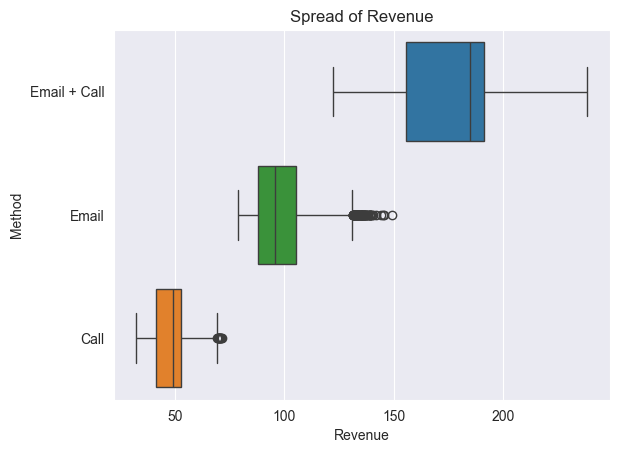

In [4]:
# What does the spread of revenue looks like for each method?

sns.boxplot(data=df, x='revenue', y='sales_method', hue='sales_method', order=['Email + Call', 'Email', 'Call'])

# Add labels and title
plt.xlabel('Revenue')
plt.ylabel('Method')
plt.title('Spread of Revenue')

# Show plot
plt.show()

*Email + Call Method:*

- The Email + Call method exhibits the widest spread of revenue, extending towards higher revenue values on the right side of the box plot.
- This indicates that the Email + Call method has the potential to generate a wide range of revenue outcomes, including both moderate and high revenue levels.
    

*Email Only Method:*

- The Email Only method is positioned in the middle of the box plot, indicating a moderate spread of revenue compared to Email + Call.
- While the spread is narrower than Email + Call, it still encompasses a range of revenue values, with more outliers observed.
- This suggests that the Email Only method is capable of generating consistent revenue outcomes across a moderate range, and the presence of outliers on the end of the distribution suggests the possibility of exceptionally high revenue achieved through this method.

*Call Only Method:*

- The Call Only method is positioned on the leftmost side of the box plot, indicating the narrowest spread of revenue among the three methods.
- Revenue outcomes for this method tend to be concentrated within a narrower range, with fewer instances of exceptionally high revenue values.
- This may suggest that the Call Only method is more predictable in terms of revenue generation but may have limitations in achieving exceptionally high revenue levels compared to the other methods.
    
*Interpretation:*

The positioning of each method on the box plot provides insights into their respective revenue distributions and variability.
Email + Call appears to offer the greatest potential for generating a wide range of revenue outcomes, including both moderate and high revenue levels.
Email Only demonstrates a moderate spread of revenue, while Call Only exhibits a narrower range of revenue outcomes, potentially indicating lower revenue variability.



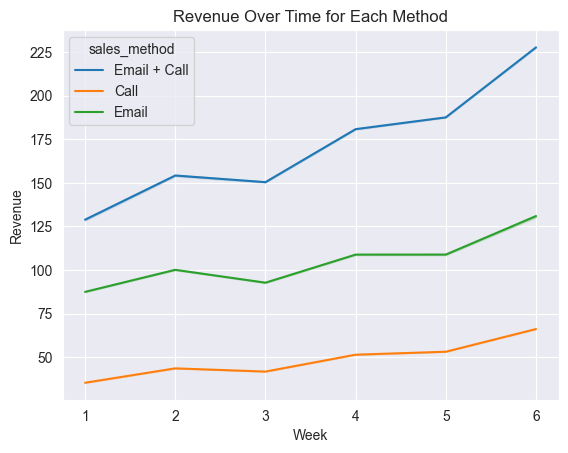

In [5]:
# Was there any difference in revenue over time for each of the methods?

sns.lineplot(data=df, x='week', y='revenue', hue='sales_method')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Revenue Over Time for Each Method')

# Show plot
plt.show()

*Revenue Over Time for Each Method:*


*Email + Call Method:*

- The line representing revenue over time for the Email + Call method shows a consistent upward trend.
- Revenue steadily increases over time, indicating a positive growth trajectory for this sales method.
- The consistently higher revenue values compared to the other methods suggest that the Email + Call approach is highly effective in generating revenue over the observed time period.
- This suggests that the combination of email and phone call outreach may synergistically enhance sales performance and contribute to sustained revenue growth.

*Email Only Method:*

- The line representing revenue over time for the Email Only method exhibits a slower rate of increase compared to Email + Call.
- While revenue shows an upward trend, it may not be as steep or consistent as that of Email + Call.
- The revenue values for Email Only are generally lower than Email + Call, indicating that this method may not be as effective in generating revenue compared to the combined approach.

*Call Only Method:*

- The line representing revenue over time for the Call Only method demonstrates the lowest revenue values among the three methods.
- Revenue trends for Call Only appear to be relatively flat or fluctuating with no significant upward trajectory.
- This suggests that relying solely on phone call outreach may not be as effective in driving revenue growth compared to email-based or combined approaches.


_Overall Interpretation:_

The line plot underscores the effectiveness of the Email + Call method in driving revenue growth over time, with consistently higher revenue values compared to Email Only and Call Only methods.
Email Only shows moderate revenue growth but may lag behind Email + Call in terms of revenue generation.
Call Only exhibits the least favorable revenue performance, with lower and relatively stagnant revenue values over time.


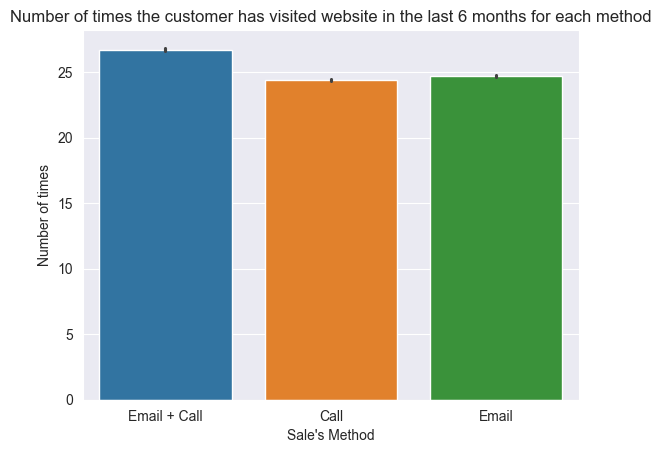

The difference in average number of website visits is statistically significant.


In [6]:
# Number of times the customer has visited website in the last 6 months for each method
sns.barplot(data=df, x='sales_method', y='nb_site_visits', hue='sales_method')

# Add labels and title
plt.xlabel("Sale's Method")
plt.ylabel('Number of times')
plt.title('Number of times the customer has visited website in the last 6 months for each method')

# Show plot
plt.show()

# Subset the DataFrame for Email + Calls method and other methods
email_calls_visits = df[df['sales_method'] == 'Email + Call']['nb_site_visits']
other_methods_visits = df[df['sales_method'] != 'Email + Call']['nb_site_visits']

# Perform t-test
t_statistic, p_value = ttest_ind(email_calls_visits, other_methods_visits, equal_var=False)

# Define significance level
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print("The difference in average number of website visits is statistically significant.")
else:
    print("The difference in average number of website visits is not statistically significant.")


*Website Engagement:*


The analysis of website engagement metrics revealed that Email + Call customers exhibited _significantly_ higher website engagement compared to Email and Call customers, highlighting the importance of integrating multiple channels in our sales approach to enhance customer interaction and drive online engagement.


_**Recommendations:**_

I would recommend continuing to prioritize and invest in this method. Here's why:

- **High Revenue Yield:** Despite approaching fewer customers through this method, the Email + Call method consistently delivers the highest revenue values over time. This suggests that the combination of email and phone call outreach is highly effective in converting engaged leads into paying customers and maximizing revenue potential.
- **Efficiency Considerations:** While Email + Call may require more time and resources from the team compared to Email Only, the superior revenue outcomes justify the investment. The incremental effort expended in executing both email and phone call outreach is offset by the significant revenue gains achieved through this integrated approach.
- **Strategic Alignment:** Aligning sales efforts with revenue generation potential is critical for maximizing return on investment and optimizing resource allocation. By prioritizing the Email + Call method, the team can focus on strategies that yield the highest revenue outcomes relative to the time and effort expended.
- **Continuous Monitoring and Optimization:** While Email + Call demonstrates strong performance in the current analysis, it's essential to continue monitoring and optimizing sales strategies to ensure sustained effectiveness over time. Regular evaluation of customer engagement, conversion rates, and revenue metrics can inform iterative improvements and enhance the efficiency and impact of sales efforts.


In summary, based on the data analysis and considerations of both revenue outcomes and resource efficiency, I recommend continuing to prioritize the Email + Call method as the preferred approach for maximizing revenue generation and achieving business objectives. Continued strategic alignment, monitoring, and optimization efforts will be essential for maintaining and enhancing the effectiveness of this method in driving business growth and profitability.
